pip install abc-analysis <br>
https://pypi.org/project/abc-analysis/

In [1]:
import numpy as np
import pandas as pd
from abc_analysis import abc_analysis, abc_plot

In [2]:
# Prep Data
df = pd.read_csv('http://bit.ly/ytviews_abc',
                 usecols=[1,2,3],
                 names=['title','pub_date','views'],
#                  parse_dates=True,
                 header=1)

df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.head()

,title,pub_date,views
0,Loop / Iterate over pandas DataFrame (2020),"Sep 11, 2020",7441
1,How to become a data analyst 2021 with no expe...,"Jan 11, 2021",5042
2,SUM COLUMNS & ROWS IN A DATAFRAME | How to sum...,"Jun 13, 2020",4571
3,SPLIT PANDAS COLUMN | How to split items into ...,"Aug 29, 2020",3942
4,How to use groupby() to group categories in a ...,"Nov 2, 2020",2324


In [3]:
# Data Downloaded on April 12, 2021 @ 13:00
# convert to datetime
df['pub_date'] = pd.to_datetime(df['pub_date'])

data_date = pd.to_datetime('2021-04-12')

df['days_published'] = ((data_date - df['pub_date']
                        ).dt.days
                        ).astype(int)

df['views_per_100_days'] = round((df['views'] / df['days_published']) * 100).astype(int)

df.head()

,title,pub_date,views,days_published,views_per_100_days
0,Loop / Iterate over pandas DataFrame (2020),2020-09-11,7441,213,3493
1,How to become a data analyst 2021 with no expe...,2021-01-11,5042,91,5541
2,SUM COLUMNS & ROWS IN A DATAFRAME | How to sum...,2020-06-13,4571,303,1509
3,SPLIT PANDAS COLUMN | How to split items into ...,2020-08-29,3942,226,1744
4,How to use groupby() to group categories in a ...,2020-11-02,2324,161,1443


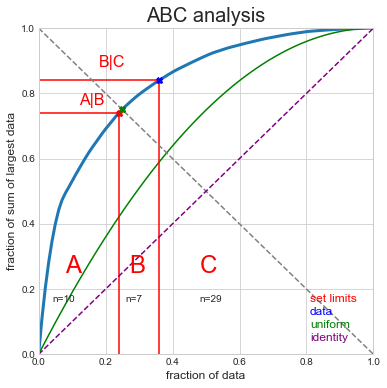

In [4]:
abc = abc_analysis(df['views_per_100_days'], True)

In [6]:
# index position of A, B, and C Videos
a_index = abc['Aind']
b_index = abc['Bind']
c_index = abc['Cind']

# New Column indicating A, B, or C
cond_list = [df.index.isin(a_index),
             df.index.isin(b_index),
             df.index.isin(c_index)]

choice_list = ['A','B','C']

df['abc'] = np.select(cond_list, choice_list)
df.sort_values(by=['views_per_100_days'], ascending=False)

,title,pub_date,views,days_published,views_per_100_days,abc
18,Is the Google Data Analytics Professional Cert...,2021-04-07,408,5,8160,A
1,How to become a data analyst 2021 with no expe...,2021-01-11,5042,91,5541,A
0,Loop / Iterate over pandas DataFrame (2020),2020-09-11,7441,213,3493,A
3,SPLIT PANDAS COLUMN | How to split items into ...,2020-08-29,3942,226,1744,A
2,SUM COLUMNS & ROWS IN A DATAFRAME | How to sum...,2020-06-13,4571,303,1509,A
4,How to use groupby() to group categories in a ...,2020-11-02,2324,161,1443,A
28,Jupyter productivity hacks for the speedy analyst,2021-03-30,177,13,1362,A
9,Create PDF with Python | Part 1,2021-01-25,911,77,1183,A
5,How to compare columns in pandas,2020-10-21,2013,173,1164,A
6,How to filter a pandas DataFrame | 6 HELPFUL M...,2020-09-29,2000,195,1026,A


https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish

In [ ]:
df = pd.read_csv('summer_sales.csv',
                 usecols=['title','price','units_sold'])

df['sales'] = df['price'] * df['units_sold']
df.head()

In [ ]:
abc = abc_analysis(df['sales'], True)

In [ ]:
# idnex position of A, B, and C Videos
a_index = abc['Aind']
b_index = abc['Bind']
c_index = abc['Cind']

# New Column indicating A, B, or C
cond_list = [df.index.isin(a_index),
             df.index.isin(b_index),
             df.index.isin(c_index)]

choice_list = ['A','B','C']

df['abc'] = np.select(cond_list, choice_list)
df.sort_values(by=['sales'], ascending=False)

In [ ]:
df['abc'].value_counts()

In [11]:
abc

{'ABLimit': 1015,
 'BCLimit': 533,
 'ABexchanged': True,
 'Aind': [0, 1, 2, 3, 4, 5, 6, 9, 18, 28],
 'Bind': [7, 10, 11, 13, 16, 23, 25],
 'Cind': [8,
  12,
  14,
  15,
  17,
  19,
  20,
  21,
  22,
  24,
  26,
  27,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 'smallestAData': 0.7406859755188762,
 'smallestBData': 0.8399545539875535,
 'AlimitIndInInterpolation': 24,
 'BlimitIndInInterpolation': 36,
 'p': 0      0.00
 1      0.01
 2      0.02
 3      0.03
 4      0.04
        ... 
 96     0.96
 97     0.97
 98     0.98
 99     0.99
 100    1.00
 Name: Effort, Length: 101, dtype: float64,
 'ABC': 0      2.581992e-18
 1      1.104477e-01
 2      2.037519e-01
 3      2.818828e-01
 4      3.468104e-01
            ...     
 96     9.989663e-01
 97     9.992953e-01
 98     9.995937e-01
 99     9.998368e-01
 100    1.000000e+00
 Name: Yield, Length: 101, dtype: float64,
 'A': {'Effort': 0.24, 'Yield': 0.7406859755188762},
 'B': {'Effo

In [7]:
df['abc'] 

In [10]:
df

,title,pub_date,views,days_published,views_per_100_days,abc
0,Loop / Iterate over pandas DataFrame (2020),2020-09-11,7441,213,3493,NaN
1,How to become a data analyst 2021 with no expe...,2021-01-11,5042,91,5541,NaN
2,SUM COLUMNS & ROWS IN A DATAFRAME | How to sum...,2020-06-13,4571,303,1509,NaN
3,SPLIT PANDAS COLUMN | How to split items into ...,2020-08-29,3942,226,1744,NaN
4,How to use groupby() to group categories in a ...,2020-11-02,2324,161,1443,NaN
5,How to compare columns in pandas,2020-10-21,2013,173,1164,NaN
6,How to filter a pandas DataFrame | 6 HELPFUL M...,2020-09-29,2000,195,1026,NaN
7,Find the Min and Max Values for Rows and Colum...,2020-10-20,1446,174,831,NaN
8,CHANGE COLUMN DTYPE | How to change the dataty...,2020-09-23,1048,201,521,NaN
9,Create PDF with Python | Part 1,2021-01-25,911,77,1183,NaN
